In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

In [13]:
# Load the dataset
file_path = '/Users/jenishmayurkumarsoni/Desktop/SalesDashboard/superstore_sales.csv'
data = pd.read_csv(file_path, encoding='latin1')


In [14]:
# Print columns to confirm dataset structure
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')



Profit by Region:
Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64


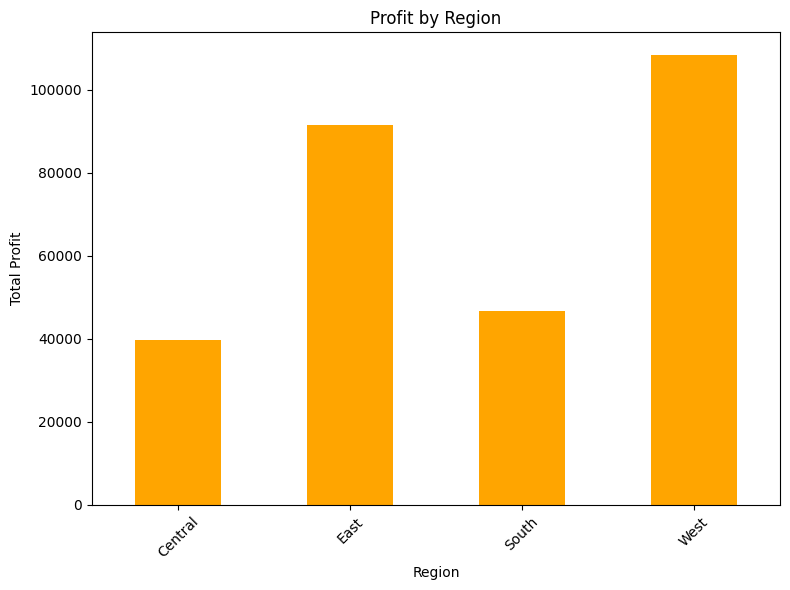

In [15]:
# Step 1: Profit by Region
if 'Region' in data.columns and 'Profit' in data.columns:
    region_profit = data.groupby('Region')['Profit'].sum()
    print("\nProfit by Region:")
    print(region_profit)

    plt.figure(figsize=(8, 6))
    region_profit.plot(kind='bar', color='orange')
    plt.title('Profit by Region')
    plt.xlabel('Region')
    plt.ylabel('Total Profit')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  # Display the plot in the notebook
else:
    print("Error: 'Region' or 'Profit' column not found.")



Sales Trend Over Time:
Order Date
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257

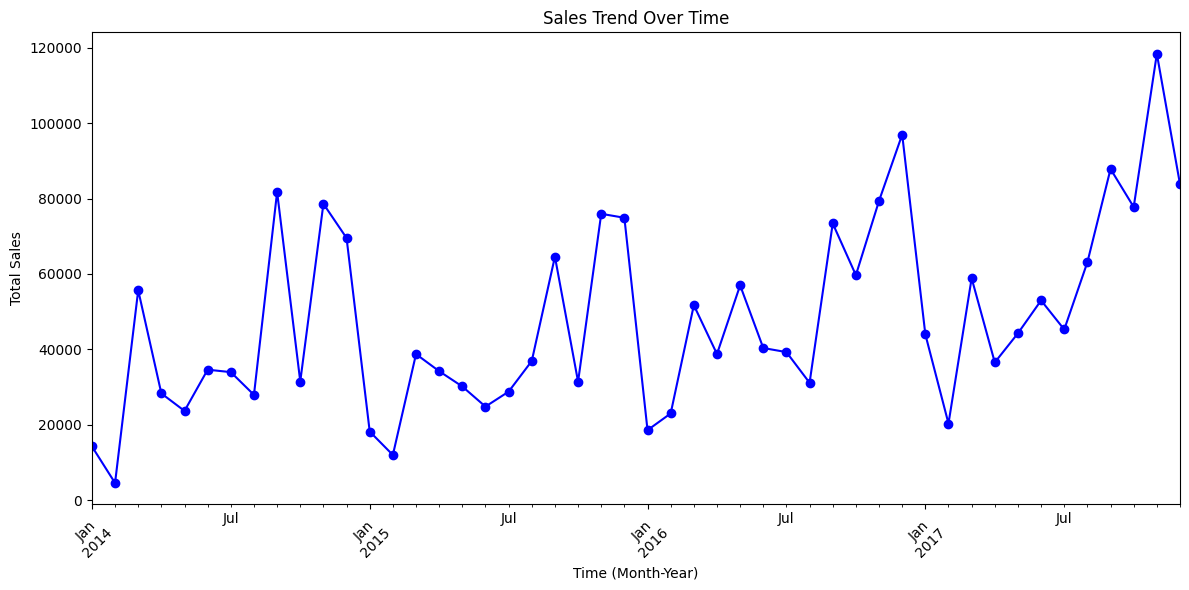

In [16]:
# Step 2: Sales Trend Over Time
if 'Order Date' in data.columns and 'Sales' in data.columns:
    data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
    sales_trend = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()

    print("\nSales Trend Over Time:")
    print(sales_trend)

    plt.figure(figsize=(12, 6))
    sales_trend.plot(kind='line', marker='o', color='blue')
    plt.title('Sales Trend Over Time')
    plt.xlabel('Time (Month-Year)')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  # Display the plot in the notebook
else:
    print("Error: 'Order Date' or 'Sales' column not found.")



Top 10 Products by Profit:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64


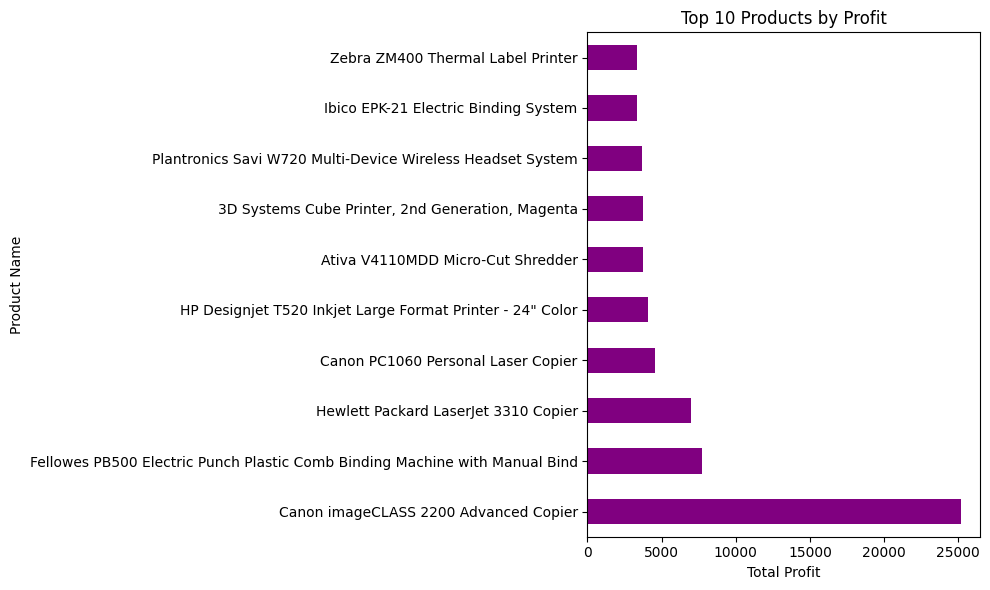

In [17]:
# Step 3: Top 10 Products by Profit
if 'Product Name' in data.columns and 'Profit' in data.columns:
    top_products_profit = data.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
    print("\nTop 10 Products by Profit:")
    print(top_products_profit)

    plt.figure(figsize=(10, 6))
    top_products_profit.plot(kind='barh', color='purple')
    plt.title('Top 10 Products by Profit')
    plt.xlabel('Total Profit')
    plt.ylabel('Product Name')
    plt.tight_layout()
    plt.show()  # Display the plot in the notebook
else:
    print("Error: 'Product Name' or 'Profit' column not found.")